In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import sem, median_abs_deviation, percentileofscore, gaussian_kde
#
import scienceplots
from cmap import Colormap

plt.style.use(['science', 'grid'])

In [3]:
df = pd.read_csv("data_pattern_MSE.csv")
# Filter out train data
df = df.loc[df.phase.str.match('(test|val)')]
# df["RMSE"] = np.sqrt(df["MSE"])

# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()

space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]
print(space_groups)
print(df_num)
groups = sorted(df.group.unique())

{1000: 'F m -3 m', 100018: 'P -4 3 n', 10009: 'F -4 3 m', 100098: 'I 2 3', 100099: 'I 2 3', 1001: 'F m -3 m', 100102: 'P -4 3 n', 100149: 'I -4 3 d', 100174: 'I -4 3 d', 100179: 'I -4 3 m', 100195: 'F d -3 m Z', 100202: 'P a -3', 100219: 'P 21 3', 100258: 'I a -3 d', 100267: 'F -4 3 m', 100268: 'F -4 3 m', 100290: 'I -4 3 m', 100309: 'F -4 3 m', 10035: 'F d -3 m S', 100393: 'F d -3 m Z', 100401: 'P a -3', 100420: 'P 21 3', 10046: 'P 41 3 2', 100510: 'P a -3', 100517: 'P n -3 Z', 100518: 'F d -3 m Z', 10052: 'F m -3 m', 100522: 'I -4 3 d', 100529: 'F d -3 m Z', 100530: 'F d -3 m Z', 100531: 'F d -3 m Z', 100532: 'F d -3 m Z', 100544: 'F d -3 m Z', 100545: 'F d -3 m Z', 100547: 'F d -3 m Z', 100548: 'F d -3 m Z', 100549: 'F d -3 m Z', 100550: 'F d -3 m Z', 100551: 'F d -3 m Z', 100552: 'F d -3 m Z', 100569: 'I 2 3', 100570: 'I 2 3', 100614: 'I a -3 d', 100615: 'I a -3 d', 100616: 'I a -3 d', 100617: 'I a -3 d', 100618: 'I a -3 d', 100619: 'I a -3 d', 100620: 'I a -3 d', 100621: 'I a -3 d

In [4]:
print(pd.read_csv("space_groups.csv", index_col="ICSD_code").value_counts())

space_group
F d -3 m Z     3209
I a -3 d        847
I m -3          686
I m -3 m        541
P m -3 n        496
F -4 3 m        493
F m -3 m        493
P m -3 m        488
I -4 3 d        486
P a -3          484
I -4 3 m        482
P -4 3 n        456
F d -3 m S      455
I a -3          438
F m -3 c        334
P -4 3 m        240
P 41 3 2        220
P 21 3          199
F d -3 Z        189
I 2 3           169
P 43 3 2        161
P m -3          128
P n -3 Z        110
P n -3 m Z      105
I 21 3          102
F m -3           78
F d -3 c Z       69
F -4 3 c         68
I 41 3 2         49
F 2 3            40
P n -3 m S       33
P n -3 S         27
P 2 3            25
P n -3 n Z       20
P 42 3 2          8
F d -3 S          8
F 4 3 2           8
F 41 3 2          6
I 4 3 2           3
P 4 3 2           1
Name: count, dtype: int64


In [5]:
data = []
for group in groups:
    group_data = []
    for c, g in space_groups.items():
        if g == group:
            try:
                group_data.append(float(df_num.loc[df_num.code == c]["MSE"]))
            except:
                pass
    data.append(group_data)

C:\Users\joe\AppData\Local\Temp\ipykernel_19680\749258625.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  group_data.append(float(df_num.loc[df_num.code == c]["MSE"]))


C:\Users\joe\AppData\Local\Temp\ipykernel_19680\1153773224.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([g for g in groups], rotation='vertical')


5.208000000000001 1.7325


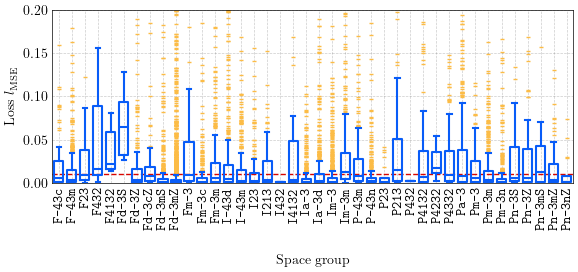

In [138]:
fig, ax = plt.subplots(figsize=(6.72, 2.25))
pparam = dict(ylabel=r'Loss $l_\text{MSE}$')
plt.minorticks_off()
plt.grid(alpha=0.2)
plt.margins(0, 0)
ax.set(**pparam)
ax.set_xticklabels([g for g in groups], rotation='vertical')
ax.set_ylim([0, 0.2])
# ax.xaxis.grid(False)

c = dict(color="#085CF8", linewidth=1.5)
boxes = ax.boxplot(data, widths=0.7, boxprops=c, medianprops=c, whiskerprops=c, capprops=c, showfliers=True)
for f in boxes['fliers']:
    # f.set_markeredgecolor("#164a78")
    f.set_markeredgecolor("#FCBC46")
    f.set_markersize(3)
    f.set_marker("_")
    f.set_zorder(1)
    # f.set_alpha(1)
    # f.set_markeredgecolor("None")

ax.tick_params(length=0, labelbottom=False)
for i, group in enumerate(groups):
    # t = f"$\\texttt{group.replace(" ", "")}$"
    t = r"$\texttt{{{0}}}$".format(group.replace(" ", ""))
    ax.text(i+1, -0.005, t, rotation=90, verticalalignment="top", horizontalalignment="center", fontsize=10)
ax.text(20.5, -0.09, "Space group", verticalalignment="center", horizontalalignment="center")
ax.axhline(0.01, c="#D70500", zorder=1, linestyle="--")
fig.savefig('figures/boxplots_pattern.pdf', format="pdf")

bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
width, height = bbox.width, bbox.height
print(width, height)

In [98]:
dataset_dir = "../datasets/FDP"

df = pd.read_csv("data_pattern.csv")

sg = pd.read_csv("space_groups.csv")

df = df.loc[df.phase.str.match('(test|val)')]
# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()

In [83]:
codes = list(sg["ICSD_code"].unique())

lattice_parameters = {}
for i, code in enumerate(codes):
    input_path = os.path.join(dataset_dir, str(code), str(code) + ".cif")
    for line in open(input_path):
        match = re.search(r'_cell_length_a\s+([\d.]+)', line)
        if match:
            lattice_parameters[code] = match.group(1)
            break

chemical_formulas = {}
for i, code in enumerate(codes):
    input_path = os.path.join(dataset_dir, str(code), str(code) + ".cif")
    with open(input_path, 'r') as file:
        data = file.read()
        match = re.search(r'_chemical_formula_sum\s+["\']([^"\']+)["\']', data)
        match2 = re.search(r'_chemical_formula_sum\s*\n*(.*?)(?=\n*;)', data)
        match3 = re.search(r'_chemical_formula_sum\s+([^"\']+)', data)
        if match:
            chemical_formulas[code] = match.group(1)
        elif match2:
            chemical_formulas[code] = match2.group(1)
        elif match3:
            chemical_formulas[code] = match3.group(1)
        else:
            print(code)

def lattice_parameter(code):
    return float(lattice_parameters[code])

def chemical_formula(code):
    return chemical_formulas[code]

In [1]:
sg["chemical_formula"] = sg.apply(lambda x: chemical_formula(x["ICSD_code"]), axis=1)
# sg_dupes = sg.drop_duplicates("chemical_formula")
sg_dupes = sg.groupby('chemical_formula').mean().reset_index()
sg_dupes

# df_num["lattice_parameter"] = df_num.apply(lambda x: lattice_parameter(x["code"]), axis=1)
# df_num["chemical_formula"] = df_num.apply(lambda x: chemical_formula(x["code"]), axis=1)

NameError: name 'sg' is not defined

In [99]:
df_dupes = df_num[df_num["code"].isin(sg_dupes["ICSD_code"].to_list())]
df_dupes

# df_dupes = df_num.groupby('lattice_parameter').mean().reset_index()
# df_dupes = df_num.drop_duplicates('lattice_parameter')

,code,Unnamed: 0,index,epoch,ZMCC
0,16,"113,532.00000","1,446.00000",100.00000,0.93349
2,93,"372,321.50000","36,063.50000",100.00000,0.99140
3,119,"369,920.66667","46,116.66667",100.00000,0.95394
4,121,"146,992.50000","34,906.50000",100.00000,0.96020
5,179,"558,167.00000","35,099.00000",100.00000,0.99072
...,...,...,...,...,...
11057,759459,"226,433.00000","2,261.00000",100.00000,0.93391
11058,759461,"517,872.00000","69,528.00000",100.00000,0.99576
11059,759462,"423,222.66667","24,694.66667",100.00000,0.99664
11061,759651,"446,871.50000","35,889.50000",100.00000,0.99971


In [100]:
d = {
    '': ['Mean', 'SEM', 'Median', 'MAD'],
    'With duplicates': [np.mean(df_num["ZMCC"]), sem(df_num["ZMCC"]), np.median(df_num["ZMCC"]), median_abs_deviation(df_num["ZMCC"])],
    'Without duplicates': [np.mean(df_dupes["ZMCC"]), sem(df_dupes["ZMCC"]), np.median(df_dupes["ZMCC"]), median_abs_deviation(df_dupes["ZMCC"])],
}
pd.options.display.float_format = "{:,.5f}".format
table = pd.DataFrame(data=d)
print(table.T)

                         0       1       2       3
                      Mean     SEM  Median     MAD
With duplicates    0.93890 0.00126 0.99323 0.00646
Without duplicates 0.92677 0.00161 0.98893 0.01061


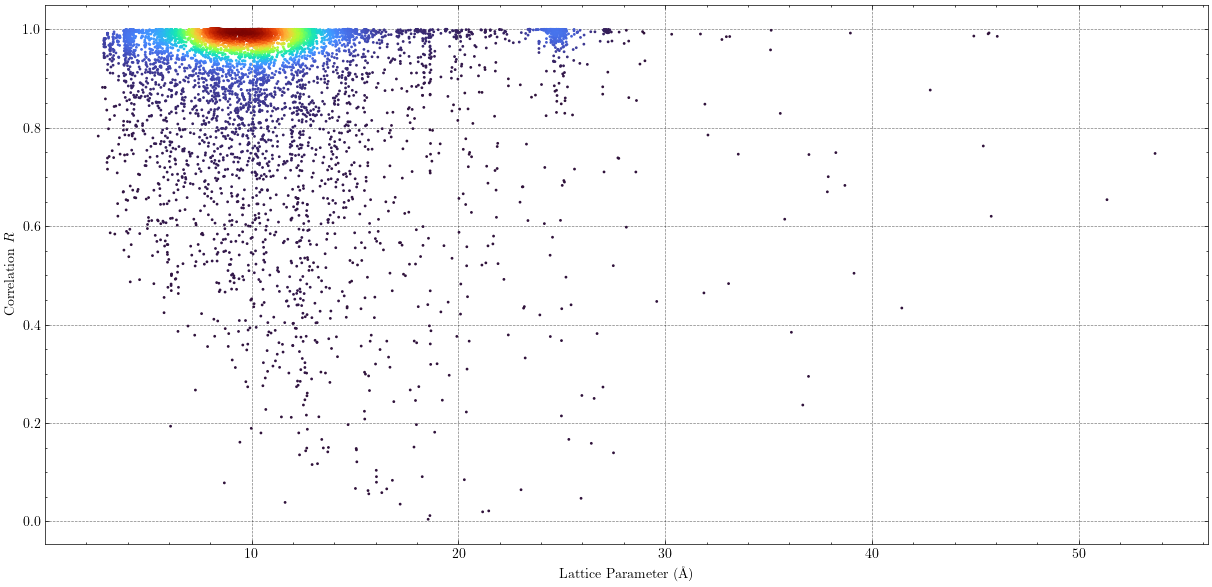

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
pparam = dict(ylabel=r'Correlation $R$', xlabel=r'Lattice Parameter (Å)')
ax.set(**pparam)


# ax.scatter(df_num["lattice_parameter"], df_num["ZMCC"], s=1, alpha=0.01, c="#085CF8")
cmap = Colormap("google:turbo").to_mpl()
xy = np.vstack([df_num["lattice_parameter"], df_num["ZMCC"]])
z = gaussian_kde(xy)(xy)
ax.scatter(df_num["lattice_parameter"], df_num["ZMCC"], c=z, s=1, cmap=cmap)

{1000: 'F m -3 m', 100018: 'P -4 3 n', 10009: 'F -4 3 m', 100098: 'I 2 3', 100099: 'I 2 3', 1001: 'F m -3 m', 100102: 'P -4 3 n', 100149: 'I -4 3 d', 100174: 'I -4 3 d', 100179: 'I -4 3 m', 100195: 'F d -3 m Z', 100202: 'P a -3', 100219: 'P 21 3', 100258: 'I a -3 d', 100267: 'F -4 3 m', 100268: 'F -4 3 m', 100290: 'I -4 3 m', 100309: 'F -4 3 m', 10035: 'F d -3 m S', 100393: 'F d -3 m Z', 100401: 'P a -3', 100420: 'P 21 3', 10046: 'P 41 3 2', 100510: 'P a -3', 100517: 'P n -3 Z', 100518: 'F d -3 m Z', 10052: 'F m -3 m', 100522: 'I -4 3 d', 100529: 'F d -3 m Z', 100530: 'F d -3 m Z', 100531: 'F d -3 m Z', 100532: 'F d -3 m Z', 100544: 'F d -3 m Z', 100545: 'F d -3 m Z', 100547: 'F d -3 m Z', 100548: 'F d -3 m Z', 100549: 'F d -3 m Z', 100550: 'F d -3 m Z', 100551: 'F d -3 m Z', 100552: 'F d -3 m Z', 100569: 'I 2 3', 100570: 'I 2 3', 100614: 'I a -3 d', 100615: 'I a -3 d', 100616: 'I a -3 d', 100617: 'I a -3 d', 100618: 'I a -3 d', 100619: 'I a -3 d', 100620: 'I a -3 d', 100621: 'I a -3 d

C:\Users\joe\AppData\Local\Temp\ipykernel_22920\4047335976.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  group_data.append(float(df_num.loc[df_num.code == c]["RMSE"]))
C:\Users\joe\AppData\Local\Temp\ipykernel_22920\4047335976.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([g for g in groups], rotation='vertical')


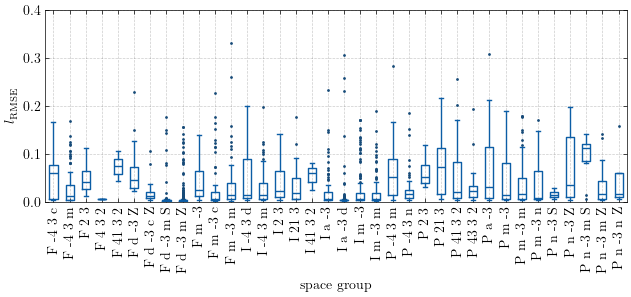

: 

In [20]:
df = pd.read_csv("data.csv")
# Ensure we are testing diffraction pattern data
df = df.loc[df.seed.str.match('^structure.*')]
# Filter out train data
df = df.loc[df.phase.str.match('(test|val)')]

df["RMSE"] = np.sqrt(df["MSE"])

# Use epoch 100
df = df.loc[df.epoch == 100]
# Use numbers to take average
df_num = df.select_dtypes(include="number")
df_num = df_num.groupby('code').mean().reset_index()

space_groups = pd.read_csv("space_groups.csv", index_col="ICSD_code").to_dict()["space_group"]
print(space_groups)
print(df_num)
groups = sorted(df.group.unique())
data = []
for group in groups:
    group_data = []
    for c, g in space_groups.items():
        if g == group:
            try:
                group_data.append(float(df_num.loc[df_num.code == c]["RMSE"]))
            except:
                pass
    data.append(group_data)
fig, ax = plt.subplots(figsize=(7.5, 2.5))
pparam = dict(xlabel=r'space group', ylabel=r'$l_\text{RMSE}$')
plt.minorticks_off()
plt.grid(alpha=0.2)
plt.margins(0, 0)
ax.set(**pparam)
ax.set_xticklabels([g for g in groups], rotation='vertical')
ax.set_ylim([0, 0.4])

black = dict(color="#0C5DA5")
boxes = ax.boxplot(data, boxprops=black, medianprops=black, whiskerprops=black, capprops=black)
for f in boxes['fliers']:
    f.set_markeredgecolor("#164a78")
    f.set_markersize(2)
    # f.set_alpha(1)
    # f.set_markeredgecolor("None")
    f.set_marker('.')

fig.savefig('figures/boxplots_structure', dpi=1200)